Użyłem bibliotek matematycznych: sympy, numpy i matplotlib. Ostatnią z nich wykorzystałem wyłącznie do sporządzania wykresów.

Na początku wczytuję biblioteki.

In [1]:
#sympy
from sympy import *
from sympy.vector import CoordSys3D, Del
#numpy
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
s = 000000 #REDACTED, tutaj powinien być numer indeksu
A = [(int(str(s)[x]) % 2) for x in range(len(str(s)))]
C = CoordSys3D('C') #system współrzędnych, C.x, C.y i C.z odpowiadają za pozycję punktu
V = A[0]*C.x**2 + A[1]*C.y**2 + A[2]*C.z**2 + A[3]*(C.x*C.y)**2 + A[4]*(C.y*C.z)**2 + A[5]*(C.z*C.x)**2 
print ('Funkcja okreslająca potencjał V(x,y,z) dla mojego indeksu wynosi:', V)

Funkcja okreslająca potencjał V(x,y,z) dla mojego indeksu wynosi: C.x**2 + C.y**2*C.z**2


Wiemy, że natężenie tego pola wynosi:

E(x,y,z) = -grad(V(x,y,z))

Metodę wyznaczania gradientu za pomocą biblioteki sympy znalazłem na stronie jej [dokumentacji](https://docs.sympy.org/latest/modules/vector/fields.html).

In [3]:
delop = Del()
E = (-delop.gradient(V)).doit().to_matrix(C)

Ograniczę wyświetlanie danych do obszaru od (-7)x(-7)x(-7) do 7x7x7. Niech krokiem do generacji wektorów natężenia będzie 2 (dobrane eksperymentalnie, tak by było możliwie jak najgęściej i strzałki nie nachodziły na siebie, by zachować czytelność). Teraz należy wyznaczyć te wektory:

In [4]:
min = -7
max = 7
step = 2
x, y, z = np.meshgrid(np.arange(min, max+step, step),
                      np.arange(min, max+step, step),
                      np.arange(min, max+step, step))
size = int((max - min)/step)+1
u = 0*x
v = 0*y
w = 0*z

def val(pos):
    return min + step*pos

for a in range (size):
    for b in range (size):
        for c in range (size):
            mat = matrix2numpy(E.evalf(subs={C.x:val(a), C.y:val(b), C.z:val(c)}))
            u[a][b][c] = mat[0][0]
            v[a][b][c] = mat[1][0]
            w[a][b][c] = mat[2][0]

Wykres stworzony za pomocą kodu poniżej posiada jedną wadę: biblioteka ma buga, który polega na tym, że głowy strzałek są rysowane w nieprawidłowych kolorach. Niestety nie znalazłem żadnego obejścia tego problemu, a nie chciałem zostawić ich niepokolorwanych, dlatego ten problem pozostał. Żeby złagodzić wynikającą z tego nieczytelność - zmniejszyłem wielkość znaczników.

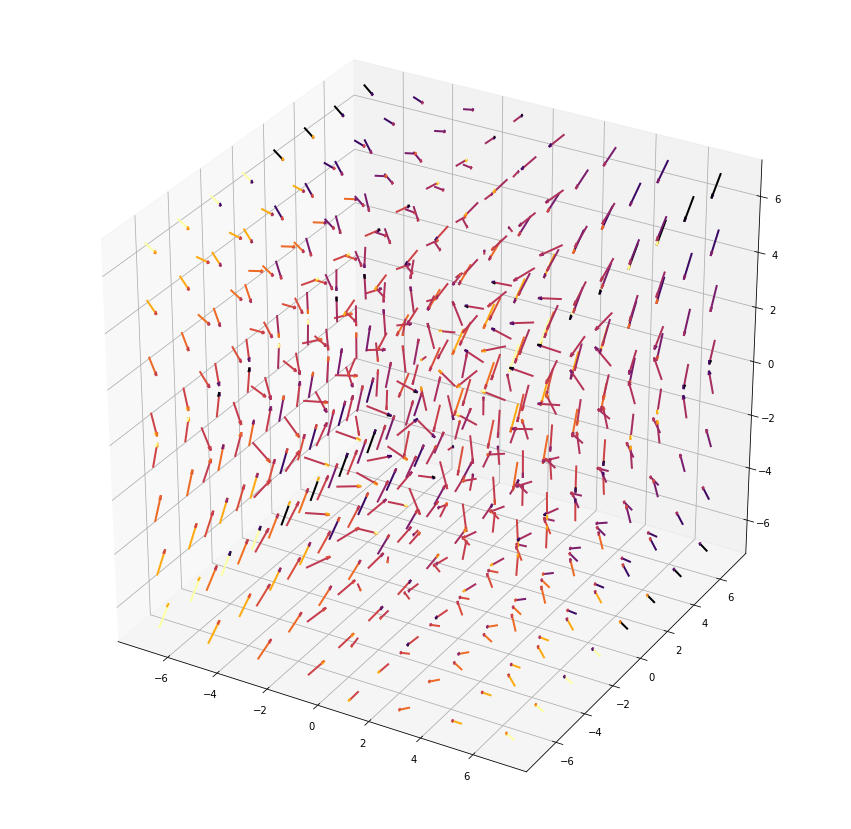

In [5]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

#koloruję strzałki w zleżności od wartości ich modułu. Tutaj wystpęwał integer overflow, więc zamieniłem sqrt(a^2 + b^2 + c^2) 
#na: a*sqrt(1 + (b/a)^2 + (c/a)^2), jest to technika poznana na przedmiocie Wprowadzenie do Informatyki na semestrze 1
colors = [u[a][b][c]*np.sqrt(1+(v[a][b][c]/u[a][b][c])**2 + (w[a][b][c]/u[a][b][c])**2) for a in range(size) for b in range(size) for c in range(size)]
norm = Normalize()
norm.autoscale(colors)
colormap = cm.inferno
colors = colormap(norm(colors))
quiv = ax.quiver(x, y, z, u, v, w, normalize=True, arrow_length_ratio=0.18, length=0.9, linewidths=2)
quiv.set_edgecolor(colors)
plt.show()

Teraz wyznaczę gęstość ładunku elektrycznego z zależności Div(E) = D/ε₀:

In [6]:
#gradient zwraca sumę wektorów i każdy z nich jest przemnożony przez inny wersor, które usuwam
from sympy.vector import divergence
#-delop.gradient(V).doit() == E
D = 8.8541878 * 10**(-12)*divergence(-delop.gradient(V).doit())
z = [[0 for j in range(size)] for i in range(size)]
for x in range (size):    
    for y in range (size):
        z[x][y] = D.evalf(subs={C.y:val(x), C.z:val(y)})
x, y = np.meshgrid(np.linspace(min, max, size), np.linspace(min, max, size))
print("Funkcja gęstości ładunku wynosi: ", D)

Funkcja gęstości ładunku wynosi:  -1.77083756e-11*C.y**2 - 1.77083756e-11*C.z**2 - 1.77083756e-11


Stworzenie ,,rozciętego'' wykresu jest nieco trudniejsze w Pythonie niż w Wolfram Mathematica i z pewnością mniej przejrzyste, ponieważ wykresy nachodzą na siebie zamiast się przecinać (czego akurat nie widać dla mojego indeksu) i ich wyświetlanie przedstawia przekroje poprzeczne cylindrów (na dodatek o dużej szerokości linii), a nie same cylindry, które chciałbym pokazać. Co więcej, występują problemy z wyświetlaniem.

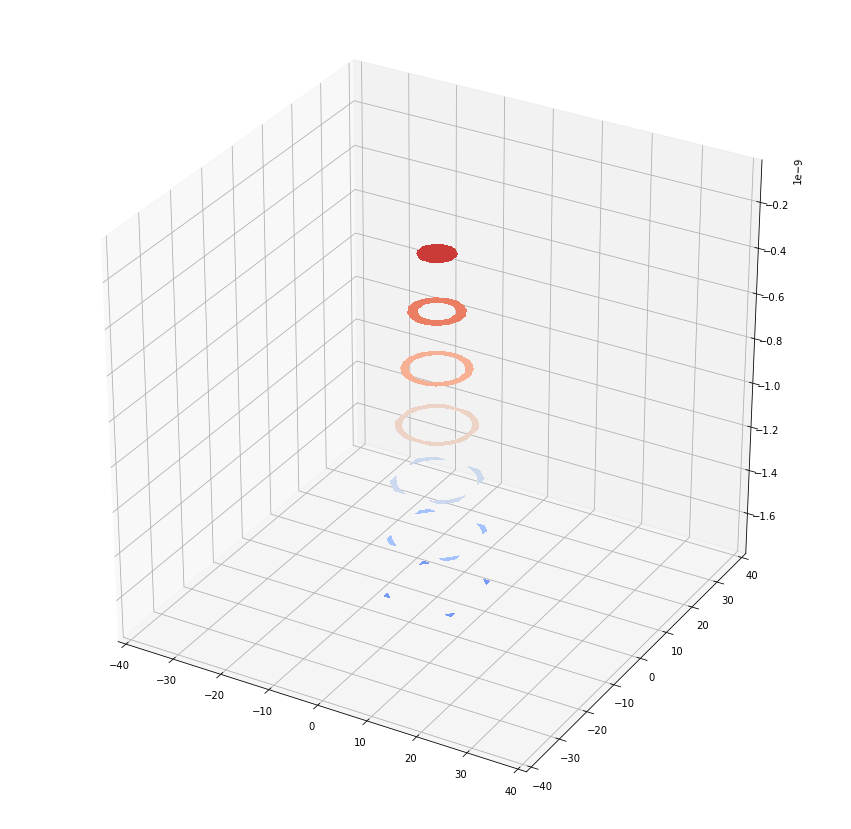

In [7]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')              
colormap = cm.inferno
colors = colormap(norm(colors))
cset = ax.contourf(x, y, z, zdir='z', cmap=cm.coolwarm)
plt.ylim(-40, 40)
plt.xlim(-40, 40)
plt.show()

Po paru dniach zaniechałem prób naprawienia tych problemów i postanowiłem wykonać zadanie w rekomendowanym programie Wolfram Mathematica.